In [1]:
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [3]:
x_train_flat = x_train.reshape(x_train.shape[0], 28*28)
x_test_flat = x_test.reshape(x_test.shape[0], 28*28)


In [4]:
train_df = pd.DataFrame(x_train_flat)
train_df['label'] = y_train

NameError: name 'pd' is not defined

In [ ]:
train_df = train_df[['label'] + [col for col in train_df.columns if col != 'label']]


In [1]:
import numpy as np 
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('mnist.csv')

In [4]:
data.drop(columns = [data.columns[0]], inplace= True)

In [5]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data = np.array(data)
m, n = data.shape
# np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
y_train = data_train[0]
x_train = data_train[1:n]
x_train = x_train / 255.
_,m_train = x_train.shape

In [7]:
def init_params(a,n_labels,x_size):
    w1 = np.random.randn(a,x_size) - 0.5
    b1 = np.random.randn(a,1) - 0.5
    
    
    
    w2 = np.random.randn(a,n_labels) - 0.5
    b2 = np.random.randn(n_labels,1) - 0.5
    
    return w1, b1, w2, b2

In [8]:
def init_param():
    hidden_cells_size = 10
    
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    
    W2 = np.random.rand(hidden_cells_size, 10) - 0.5
    b2 = np.random.rand(hidden_cells_size, 1) - 0.5
    

    W3 = np.random.rand(10, hidden_cells_size) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    
    return W1, b1, W2, b2, W3, b3

In [9]:
def leaky_relu(z, alpha=0.01):
    return np.where(z > 0, z, alpha * z)

def deriv_leaky_relu(z, alpha=0.01):
    return np.where(z > 0, 1, alpha)

In [10]:
def relu(z):
    return np.maximum(z,0)

def softmax(Z):
#     shift_x = x - np.max(x)
#     exp_x = np.exp(shift_x)
#     a = exp_x / np.sum(exp_x)
#     return a
    A = np.exp(Z) / sum(np.exp(Z))
    return A


In [11]:
def for_prop(x, w1, b1, w2, b2, w3, b3):
    z1 = w1.dot(x) + b1
    a1 = relu(z1)
    
    z2 = w2.dot(a1) + b2
    a2 = relu(z2)
    
    z3 = w3.dot(a2) + b3  # b3 is broadcast to match z3's shape
    a3 = softmax(z3)
    
    return z1, a1, z2, a2, z3, a3

In [12]:
def one_hot(y):
    one_hot_y = np.zeros((y.size, y.max()+1))
    one_hot_y[np.arange(y.size), y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y

In [13]:
def deriv_relu(z):
    return z>0

In [14]:
def back_prop(z1,a1,z2,a2,z3,a3,w1,w2,w3,x,y):
    one_hot_y = one_hot(y)
    
    dz3 = a3 - one_hot_y
    dw3 = 1/m * dz3.dot(a2.T)
    db3 = 1/m * np.sum(dz3)
    
    dz2 = w3.T.dot(dz3) * deriv_relu(z2)
    dw2 = 1/m * dz2.dot(a1.T)
    db2 = 1/m * np.sum(dz2)
    
    dz1 = w2.T.dot(dz2) * deriv_relu(z1)
    dw1 = 1/m * dz1.dot(x.T)
    db1 = 1/m*np.sum(dz1)
    
    return dw1, db1, dw2, db2, dw3, db3
    
    

In [15]:
def update_params(w1,b1,w2,b2,w3,b3,dw1, db1, dw2, db2, dw3, db3,lr):
    w1 = w1 - lr*dw1
    b1 = b1 - lr*db1
    
    w2 = w2 - lr*dw2
    b2 = b2 - lr*db2
    
    w3 = w3 - lr*dw3
    b3 = b3 - lr*db3

    return w1, b1, w2, b2, w3, b3

In [16]:
def get_pred(a2):
    return np.argmax(a2,0)

def get_acc(pred,y):
    return np.sum(y == pred)/y.size

In [207]:
np.unique(y_train).shape[0]

10

In [208]:
def grad_desc(x,y,epochs,lr):
    x_size = x.shape[0]
    n_labels = np.unique(y).shape[0]
    a = 10
    
    
    w1, b1, w2, b2, w3, b3 = init_param()
    
    for i in range(epochs):
        z1, a1, z2, a2, z3, a3 = for_prop(x, w1, b1, w2, b2, w3, b3)
        dw1, db1, dw2, db2, dw3, db3 = back_prop(z1, a1, z2, a2, z3, a3,w1,w2,w3,x,y)
        w1, b1, w2, b2, w3, b3 = update_params(w1,b1,w2,b2,w3,b3,dw1, db1, dw2, db2, dw3, db3,lr)
        
        print(f'Accuracy of {i}th iteration is {get_acc(get_pred(a3),y)}')
    
    return w1, b1, w2, b2, w3, b3
#     return x,get_pred(a2)

    

In [255]:
W1, b1, W2, b2, W3, b3 = grad_desc(x_train, y_train, 100, 0.01)

Accuracy of 0th iteration is 0.0921219512195122
Accuracy of 1th iteration is 0.09153658536585366
Accuracy of 2th iteration is 0.09136585365853658
Accuracy of 3th iteration is 0.09124390243902439
Accuracy of 4th iteration is 0.09070731707317073
Accuracy of 5th iteration is 0.09021951219512195
Accuracy of 6th iteration is 0.08990243902439024
Accuracy of 7th iteration is 0.08951219512195122
Accuracy of 8th iteration is 0.08921951219512195
Accuracy of 9th iteration is 0.089
Accuracy of 10th iteration is 0.08865853658536585
Accuracy of 11th iteration is 0.08809756097560975
Accuracy of 12th iteration is 0.08758536585365853
Accuracy of 13th iteration is 0.0871951219512195
Accuracy of 14th iteration is 0.08663414634146341
Accuracy of 15th iteration is 0.08607317073170731
Accuracy of 16th iteration is 0.08570731707317074
Accuracy of 17th iteration is 0.08529268292682927
Accuracy of 18th iteration is 0.085
Accuracy of 19th iteration is 0.08492682926829269
Accuracy of 20th iteration is 0.08470731

In [210]:
[i.shape for i in [W1, b1, W2, b2, W3, b3]]

[(10, 784), (10, 1), (5, 10), (5, 1), (10, 5), (10, 1)]

In [211]:
def make_predictions(x, w1, b1, w2, b2, w3, b3):
    _,_,_, _, _, A3 = for_prop(x, w1, b1, w2, b2, w3, b3)
    predictions = get_pred(A3)
    return predictions

In [212]:
def test_prediction(index, w1, b1, w2, b2, w3, b3):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], w1, b1, w2, b2, w3, b3)
    label = y_train[index]
    
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    
    return prediction

In [213]:
x_train.shape

(784, 41000)

In [214]:
np.random.randint(x_train.shape[1])

1202

Prediction:  [8]
Label:  5


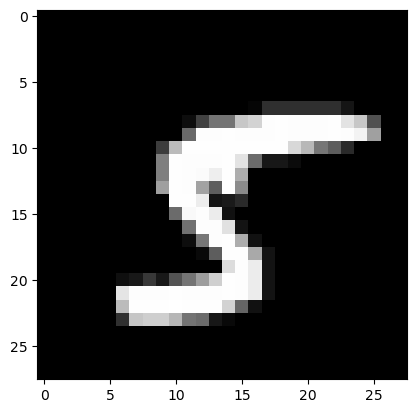

In [230]:
pred = test_prediction(np.random.randint(x_train.shape[1]), W1, b1, W2, b2, W3, b3)


Prediction:  [5]
Label:  4


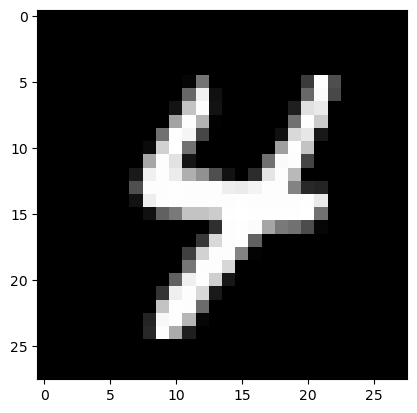

array([5], dtype=int64)

In [248]:
test_prediction(243, W1, b1, W2, b2, W3, b3)


In [190]:
a = x_train[:,243]

In [191]:
make_predictions(a, W1, b1, W2, b2, W3, b3)


array([3, 3, 0, ..., 3, 5, 3], dtype=int64)

In [192]:
pred.shape

(41000,)

In [193]:
a.shape

(784,)

In [ ]:
m,n = data.shape

In [ ]:
m,n

In [ ]:
get_acc

In [235]:
z = np.random.rand(10, 784) - 0.5

In [239]:
z[0][0]

0.23850540815566312

In [243]:
leaky_relu(-4)

array(-0.04)

In [241]:
np.where?